In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [15]:
train_dr = r'C:\Users\91842\OneDrive\Desktop\data\train'
test_dr = r'C:\Users\91842\OneDrive\Desktop\data\test'
validation_dr = r'C:\Users\91842\OneDrive\Desktop\data\validation'

In [16]:
#Data preprocessing
#1.read the picture file

#2.decolde the jpg content into RGB grid pixels

#3.convert it into floating point Tensor

#4.Rescale the pixel values between (0-255) to the [0-1] interval

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
#Generating batches of tensor image data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dr,
    target_size=(150,150),
    batch_size=20,
    class_mode = 'binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dr,
     target_size=(150,150),
    batch_size=20,
   class_mode ='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [19]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu', input_shape=[150,150,3]))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu', input_shape=[150,150,3]))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu', input_shape=[150,150,3]))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [23]:
from tensorflow.keras import optimizers
model.compile(
    loss='binary_crossentropy',
    optimizer = optimizers.RMSprop(lr=1e-4),
    metrics=['acc']
)

In [26]:
model_history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data = validation_generator,
    validation_steps=50,
)

C:\Users\91842\AppData\Local\Temp/ipykernel_11512/3935959632.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_history = model.fit_generator(


Epoch 1/20
100/100 [==============================] - 35s 337ms/step - loss: 0.6845 - acc: 0.5515 - val_loss: 0.6661 - val_acc: 0.5830
Epoch 2/20
100/100 [==============================] - 31s 309ms/step - loss: 0.6505 - acc: 0.6245 - val_loss: 0.6406 - val_acc: 0.6260
Epoch 3/20
100/100 [==============================] - 33s 334ms/step - loss: 0.6018 - acc: 0.6785 - val_loss: 0.6510 - val_acc: 0.6160
Epoch 4/20
100/100 [==============================] - 33s 330ms/step - loss: 0.5648 - acc: 0.7155 - val_loss: 0.6590 - val_acc: 0.6340
Epoch 5/20
100/100 [==============================] - 31s 314ms/step - loss: 0.5367 - acc: 0.7220 - val_loss: 0.5859 - val_acc: 0.6880
Epoch 6/20
100/100 [==============================] - 33s 334ms/step - loss: 0.5094 - acc: 0.7460 - val_loss: 0.6281 - val_acc: 0.6710
Epoch 7/20
100/100 [==============================] - 33s 329ms/step - loss: 0.4772 - acc: 0.7670 - val_loss: 0.6059 - val_acc: 0.6690
Epoch 8/20
100/100 [==============================] - 3

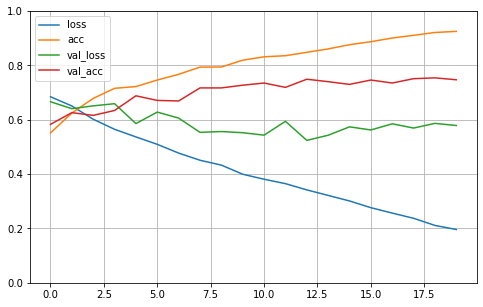

In [28]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [29]:
model.save("model_dog_cat.h5")

In [31]:
test_generator = train_datagen.flow_from_directory(
    test_dr,
    target_size=(150,150),
    batch_size=20,
    class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [32]:
model.evaluate(test_generator,steps=50)

50/50 [==============================] - 5s 103ms/step - loss: 0.6048 - acc: 0.7450


[0.6047760248184204, 0.7450000047683716]